<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Instructor: Aymeric Flaisler_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'


### 1. Load the NHL data

In [15]:
NHL = pd.read_csv(web_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [16]:
NHL.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,SA,SF60,SA60,SF%,FF,FA,FF60,FA60,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,1047,33.3,31.4,51.5,1526,1449,45.7,43.4,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,1053,33.4,30.7,52.0,1602,1414,46.7,41.3,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,1039,33.1,32.3,50.6,1493,1442,46.4,44.8,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,868,35.2,25.8,57.7,1599,1151,47.5,34.2,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,1115,31.5,32.6,49.2,1504,1442,44.0,42.2,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [17]:
NHL.shape

(90, 28)

In [18]:
NHL.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,SA60,SF%,FF,FA,FF60,FA60,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,31.292222,49.956667,1475.377778,1475.377778,43.155556,43.217778,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,2.100306,2.793494,129.880116,109.025569,2.951180,3.047105,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,25.800000,43.200000,1138.000000,1151.000000,36.000000,34.200000,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,29.800000,48.300000,1380.750000,1409.500000,40.900000,41.350000,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,31.500000,50.150000,1474.500000,1477.500000,43.400000,43.450000,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,32.900000,51.675000,1566.250000,1551.000000,45.500000,45.150000,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,35.900000,57.700000,1762.000000,1735.000000,49.500000,50.500000,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [19]:
# NHL.isnull().sum()

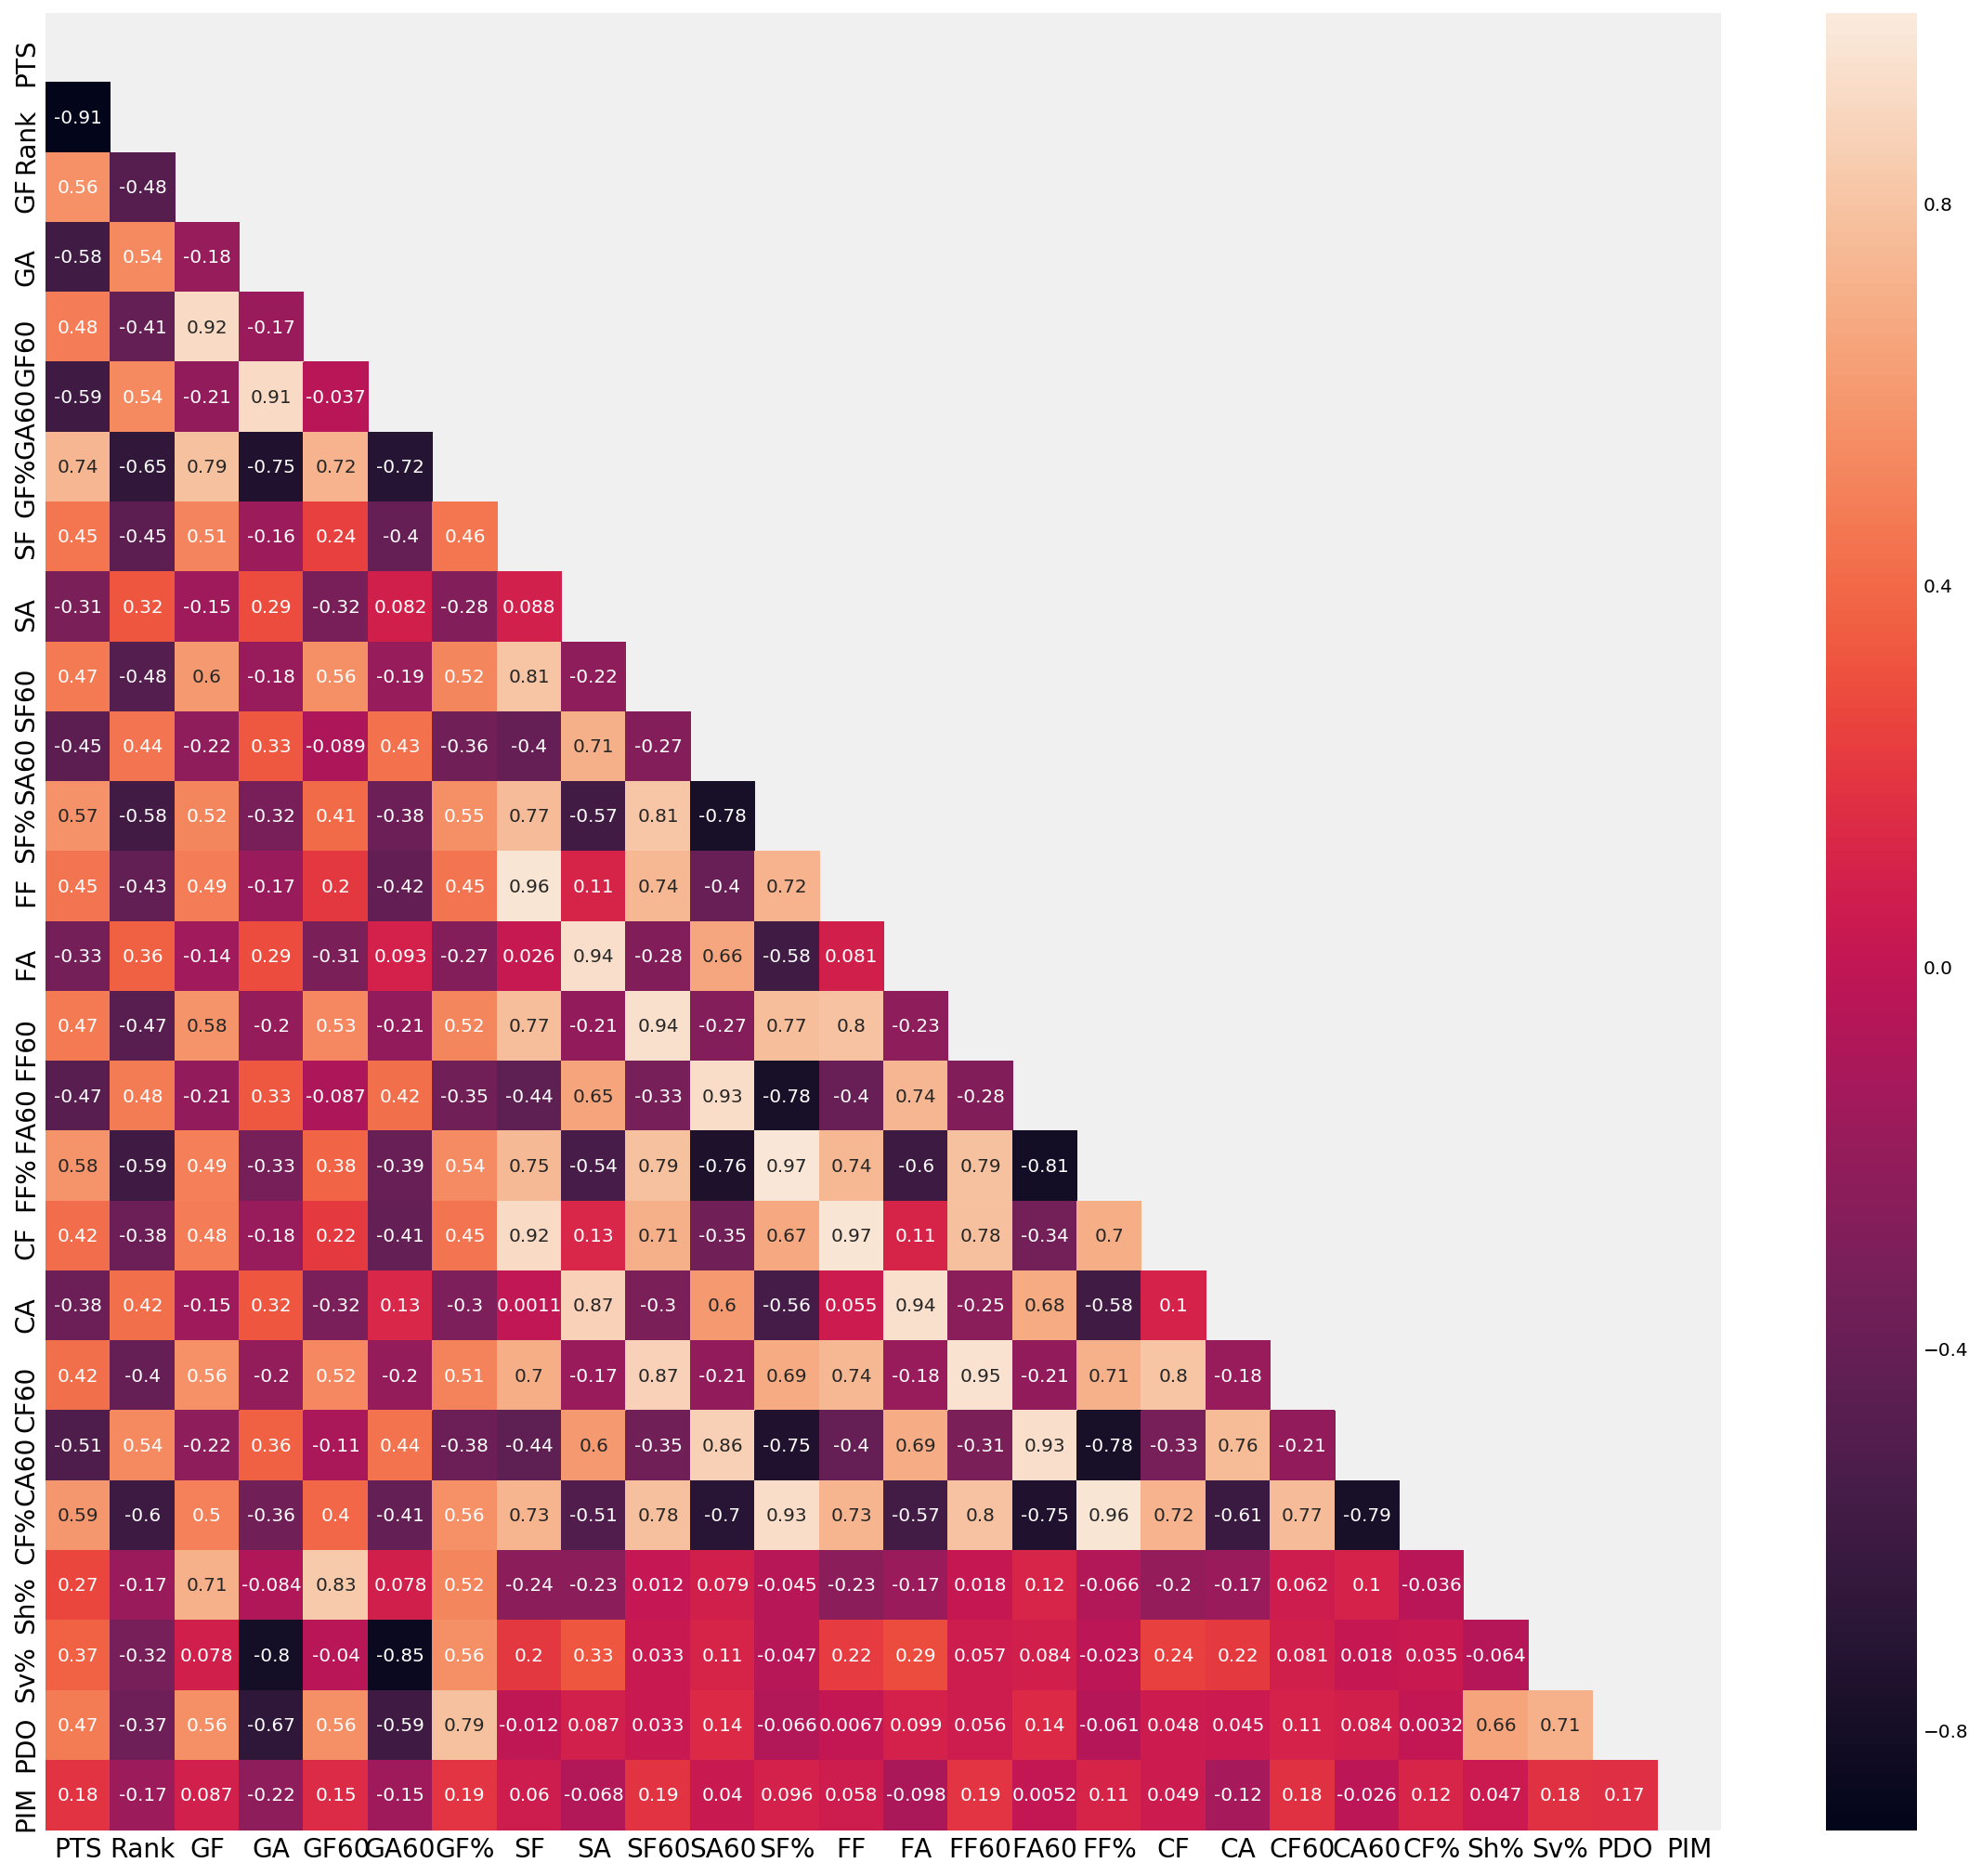

In [20]:
corr = NHL.corr()

fig, ax = plt.subplots(figsize=(18,18))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [21]:
NHL.Rank.nunique()

3

In [22]:
NHL.Rank.unique()

array([1, 2, 3])

In [23]:
# store response vector in "y"
y = NHL.Rank

### 4. What is the baseline accuracy?

In [24]:
y.count()

90

In [25]:
y.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

In [27]:
# calculate the baseline accuracy:
y.value_counts(normalize=True)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

In [49]:
# baseline is ~34% (proportion of majority class: rank 3)

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [28]:
# store design matrix in "X"
feature_cols = ['CF%', 'GF', 'Sh%', 'PDO']
X = NHL[feature_cols]

In [29]:
X.head(3)

,CF%,GF,Sh%,PDO
0,52.5,115,10.34,1034
1,53.4,94,8.22,1014
2,51.4,90,8.45,1019


In [30]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

# check y's shape (single dimension with length n)
print(y.shape)

(90, 4)
(90,)


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [32]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


In [33]:
# what are we observing from the above accuracy? 100% accuracy is indicative
# that we are overfitting. We can't really trust the accuracy as evaluated
# on the data we trained on...

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [34]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.5)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5111111111111111


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [35]:
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.3111111111111111


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [36]:
# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

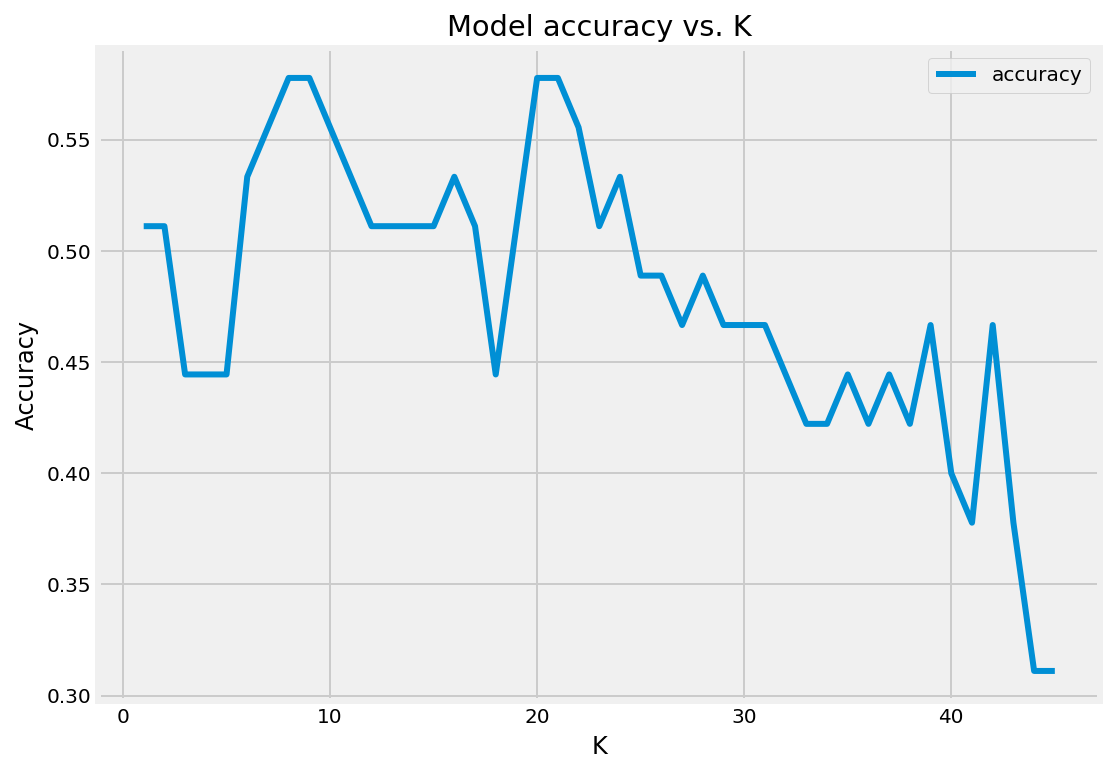

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, X_train.shape[0]+1), test_acc, lw=3., label="accuracy")
ax.legend()
ax.set_title('Model accuracy vs. K')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K')
plt.show()

In [60]:
np.argmax(test_acc)

7

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [38]:
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

72.0


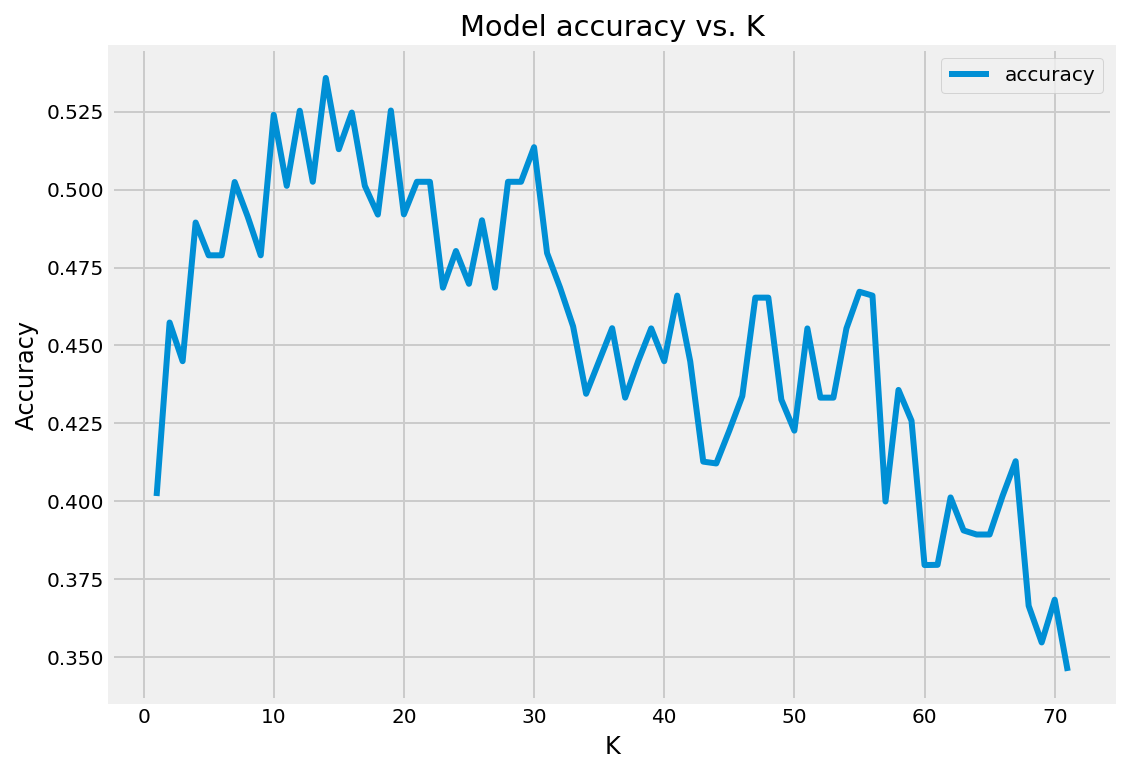

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3., label='accuracy')
ax.legend()
ax.set_title('Model accuracy vs. K')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K')
plt.show()

In [40]:
np.argmax(test_acc)

13

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [41]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [42]:
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

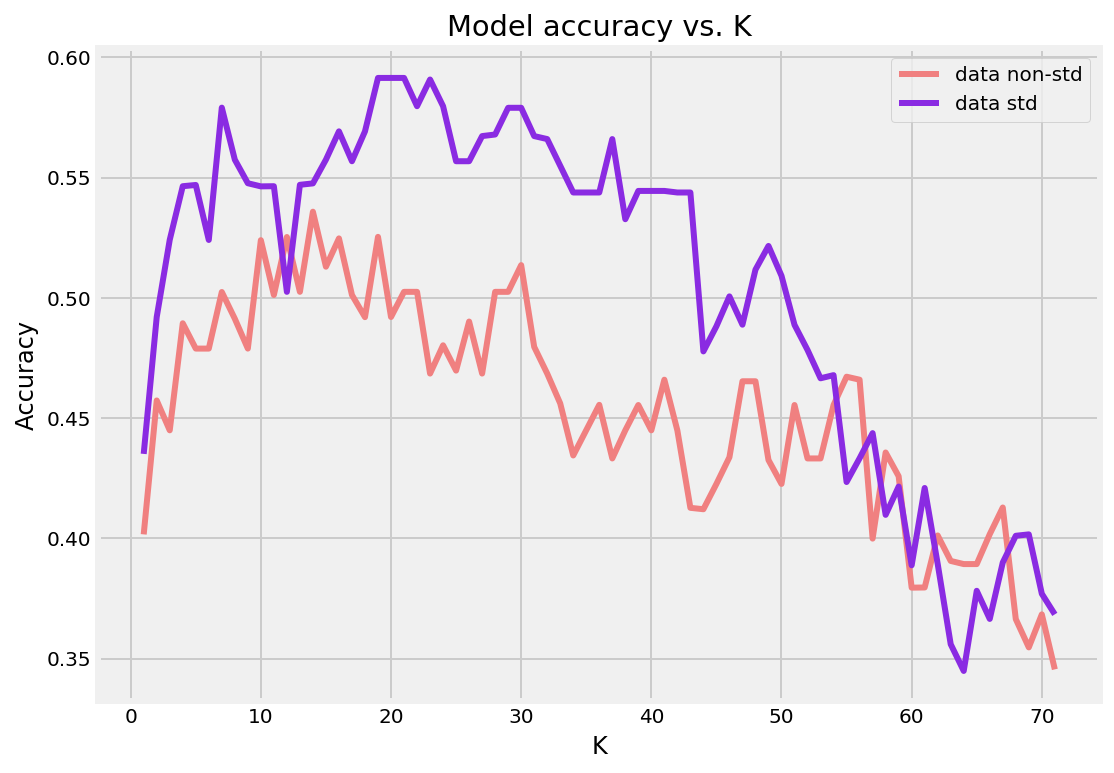

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3.,color='lightcoral', label='data non-std')
ax.plot(range(1, int(max_neighbors)), test_acc_std, lw=3., color='blueviolet', label='data std')
ax.legend()
ax.set_title('Model accuracy vs. K')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K')
plt.show()

In [ ]:
# Standardization makes sure that the scale of the predictor variables 
# doesn't artificially impact the distance. 